In [31]:
from matplotlib.backends.backend_pdf import PdfPages
from mpl_toolkits.mplot3d import Axes3D  
import matplotlib.pyplot as plt1
import matplotlib.pyplot as plt2
import matplotlib.pyplot as plt3
import matplotlib.pyplot as plt4
import matplotlib.pyplot as plt5
import matplotlib.pyplot as plt6
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from py_vollib.black_scholes.implied_volatility import implied_volatility 
from py_vollib.black_scholes import black_scholes as prc 
import numpy as np



strikes [2525. 2600. 2675. 2750. 2800. 2850. 2900. 2950. 3000. 3050. 3100. 3150.
 3200. 3275. 3325. 3375. 3425. 3500. 3575. 3700.]
prices [[6.9990e+02 6.2490e+02 5.5065e+02 4.7590e+02 4.2640e+02 3.7700e+02
  3.2770e+02 2.7900e+02 2.3030e+02 1.8245e+02 1.3550e+02 9.0300e+01
  4.9550e+01 1.0200e+01 2.3500e+00 6.2500e-01 2.7500e-01 1.5000e-01
  7.5000e-02 5.0000e-02]
 [7.0035e+02 6.2640e+02 5.5275e+02 4.7960e+02 4.3105e+02 3.8300e+02
  3.3535e+02 2.8830e+02 2.4200e+02 1.9695e+02 1.5315e+02 1.1195e+02
  7.4200e+01 3.0850e+01 1.4450e+01 6.4500e+00 2.9750e+00 1.0250e+00
  4.5000e-01 1.7500e-01]
 [7.0160e+02 6.2855e+02 5.5565e+02 4.8400e+02 4.3675e+02 3.8985e+02
  3.4365e+02 2.9820e+02 2.5390e+02 2.1080e+02 1.6925e+02 1.3005e+02
  9.3950e+01 4.9400e+01 2.8750e+01 1.5700e+01 8.4000e+00 3.5500e+00
  1.5500e+00 4.7500e-01]
 [7.0500e+02 6.3220e+02 5.6110e+02 4.9025e+02 4.4425e+02 3.9845e+02
  3.5345e+02 3.0905e+02 2.6600e+02 2.2445e+02 1.8400e+02 1.4555e+02
  1.0990e+02 6.4350e+01 4.1250e+01 2.48

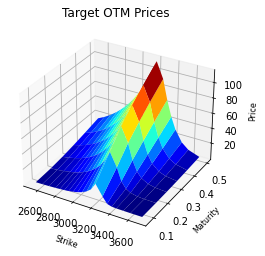

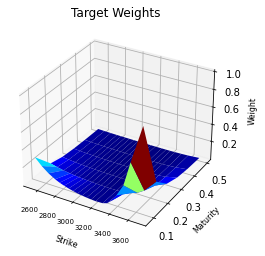

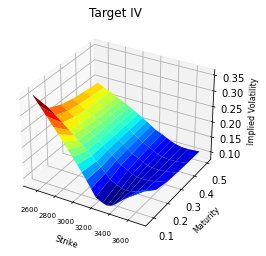

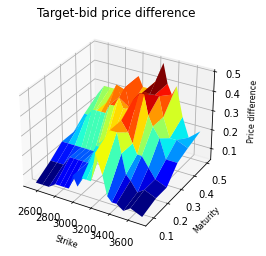

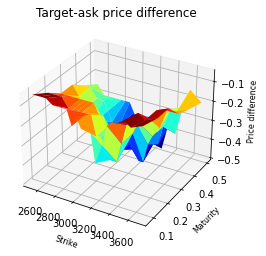

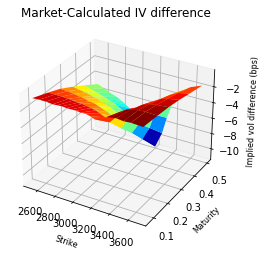

put_call_parity_calls [[6.96804323e+02 6.22003857e+02 5.47303391e+02 4.72727926e+02
  4.23127615e+02 3.73577305e+02 3.24226994e+02 2.75151684e+02
  2.26501373e+02 1.78451063e+02 1.31350753e+02 8.60504421e+01
  4.51001316e+01 1.02000000e+01 2.35000000e+00 6.25000000e-01
  2.75000000e-01 1.50000000e-01 7.50000000e-02 5.00000000e-02]
 [6.98686486e+02 6.24494401e+02 5.50602317e+02 4.77160232e+02
  4.28465509e+02 3.80170786e+02 3.32376063e+02 2.85181340e+02
  2.38886617e+02 1.93491894e+02 1.49697171e+02 1.08152448e+02
  7.01077246e+01 3.08500000e+01 1.44500000e+01 6.45000000e+00
  2.97500000e+00 1.02500000e+00 4.50000000e-01 1.75000000e-01]
 [7.01138363e+02 6.27649304e+02 5.54760245e+02 4.82471187e+02
  4.34878481e+02 3.87785776e+02 3.41293070e+02 2.95750364e+02
  2.51057658e+02 2.07714953e+02 1.65922247e+02 1.26379541e+02
  9.00368357e+01 4.94000000e+01 2.87500000e+01 1.57000000e+01
  8.40000000e+00 3.55000000e+00 1.55000000e+00 4.75000000e-01]
 [7.04277544e+02 6.31639649e+02 5.59701754e+0

In [90]:
# load market data

indices=[0,3,6,9,11,13,15,17,19,21,23,25,27,30,32,34,36,39,42,45]
maturities= np.load('SPX_call_maturity.npy')[:6]
strikes=np.load('SPX_strikes.npy')[indices]
market_IV_call=np.load('SPX_call_iv.npy').T[:6, indices]
market_IV_put=np.load('SPX_put_iv.npy').T[:6, indices]
call_prices=np.load('SPX_call_price.npy').T[:6, indices]
call_prices_bid=np.load('SPX_call_bid.npy').T[:6, indices]
call_prices_ask=np.load('SPX_call_ask.npy').T[:6, indices]
put_prices=np.load('SPX_put_price.npy').T[:6, indices]
put_prices_bid=np.load('SPX_put_bid.npy').T[:6, indices]
put_prices_ask=np.load('SPX_put_ask.npy').T[:6, indices]
S0=3221.22

# save data for selected strikes

np.save('call_prices_bid.npy',call_prices_bid)
np.save('call_prices_ask.npy',call_prices_ask)
np.save('put_prices_bid.npy',put_prices_bid)
np.save('put_prices_ask.npy',put_prices_ask)
np.save('put_prices.npy',put_prices)
np.save('call_IV.npy',market_IV_put)
np.save('put_IV.npy',market_IV_call)

# Print strikes (to check that strikes 3225 and 3250 are removed)

print('strikes',strikes)

log_mon=np.log((strikes)/S0)
n1=len(maturities)
n2=len(strikes)
vol_surf=np.zeros((n1,n2))
target_prices = np.zeros((n1,n2))
target_prices_ask = np.zeros((n1,n2))
target_prices_bid = np.zeros((n1,n2))
weights_surf=np.zeros((n1,n2))
market_IV=np.zeros((n1,n2))
put_call_parity_calls = np.zeros((n1,n2))
constant_shift=0.01
int_rates = np.zeros_like(maturities)
int_rates[0] =  -0.0000809367553536768 # (r_1-q_1)=ln(F1/S0)/t_1 
int_rates[1] =  0.0006114879824147670 # (r_2-q_2)=ln(F2/S0)/t_2 
int_rates[2] =  0.0005851904926531780 # (r_3-q_3)=ln(F3/S0)/t_3 
int_rates[3] =  0.0004951010053315330 # (r_4-q_4)=ln(F4/S0)/t_4 
int_rates[4] = 0.0003930890456256710 # (r_5-q_5)=ln(F5/S0)/t_5 
int_rates[5] =  0.0002552450385663650 # (r_6-q_6)=ln(F6/S0)/t_6 


for k in range(0,n1):
    for j in range(0,n2):
        try:
                if strikes[j]>S0:
                    vol_surf[k,j]=implied_volatility(call_prices[k,j],  S=S0, K=strikes[j], r=int_rates[k], t=maturities[k]-1/365, flag="c")
                    target_prices[k,j] = call_prices[k,j]
                    put_call_parity_calls[k,j] = call_prices[k,j]
                    market_IV[k,j] = market_IV_call[k,j]
                    target_prices_ask[k,j] = call_prices_ask[k,j]
                    target_prices_bid[k,j] = call_prices_bid[k,j]
                    iv_temp = vol_surf[k,j]+constant_shift
                    weights_surf_call[k,j]=constant_shift/(prc(flag='c',S=S0,K=strikes[j],t=maturities[k]-1/365,r=int_rates[k],sigma=iv_temp)-call_prices[k,j])
                else:
                    vol_surf[k,j]=implied_volatility(put_prices[k,j],  S=S0, K=strikes[j], r=int_rates[k], t=maturities[k]-1/365, flag="p")
                    target_prices[k,j] = put_prices[k,j]
                    put_call_parity_calls[k,j] = put_prices[k,j]+S0-exp(-int_rates[k]*maturities[k])*strikes[j]
                    target_prices_ask[k,j] = put_prices_ask[k,j]
                    target_prices_bid[k,j] = put_prices_bid[k,j]
                    market_IV[k,j] = market_IV_put[k,j]
                    iv_temp = vol_surf[k,j]+constant_shift
                    weights_surf_call[k,j]=constant_shift/(prc(flag='p',S=S0,K=strikes[j],t=maturities[k]-1/365,r=int_rates[k],sigma=iv_temp)-put_prices[k,j])
        except:
                pass
            
                   
weights_surf_call=weights_surf_call/(np.max(weights_surf_call))
print('prices', call_prices)
print('vol_surf', vol_surf)
print('vega weights', weights_surf_call)



fig1 = plt1.figure()
ax1 = fig1.gca(projection='3d')
    
fig2 = plt2.figure()
ax2 = fig2.gca(projection='3d')

fig3 = plt3.figure()
ax3 = fig3.gca(projection='3d')

fig4 = plt4.figure()
ax4 = fig4.gca(projection='3d')

fig5 = plt5.figure()
ax5 = fig5.gca(projection='3d')

fig6 = plt6.figure()
ax6 = fig6.gca(projection='3d')


#Data
X1 = strikes #log_mon
Y1 = maturities
Z1 = target_prices
X1, Y1 = np.meshgrid(X1, Y1)

# Plot the surface.
ax1.plot_surface(X1, Y1, Z1, cmap=plt1.cm.jet, linewidth=0, antialiased=True)
ax1.set_xlabel("Strike",fontsize=8)#ax1.set_xlabel("Log-moneyness",fontsize=8)
ax1.set_ylabel("Maturity",fontsize=8)
ax1.set_zlabel("Price",fontsize=8)
ax1.set_title("Target OTM Prices")
fig1.savefig('Target_Prices.pdf', format='pdf')
   
#Data
X2 = strikes #log_mon
Y2 = maturities
X2, Y2 = np.meshgrid(X2, Y2)
Z2 = weights_surf_call#vega_surf_call.reshape((6, 7))

# Plot the surface.
ax2.plot_surface(X2, Y2, Z2, cmap=plt2.cm.jet, linewidth=0, antialiased=True)
ax2.set_xlabel("Strike",fontsize=8)
ax2.set_ylabel("Maturity",fontsize=8)
ax2.set_zlabel("Weight",fontsize=8)
ax2.set_title("Target Weights")
for tick in ax2.xaxis.get_major_ticks():
        tick.label.set_fontsize(7) 

fig2.savefig('Target_Vega_Weights.pdf', format='pdf')

X3 = strikes #log_mon
Y3 = maturities
Z3 = vol_surf
X3, Y3 = np.meshgrid(X3, Y3)

# Plot the surface.
ax3.plot_surface(X3, Y3, Z3, cmap=plt2.cm.jet, linewidth=0, antialiased=True)
ax3.set_xlabel("Strike",fontsize=8)
ax3.set_ylabel("Maturity",fontsize=8)
ax3.set_zlabel("Implied Volatility",fontsize=8)
ax3.set_title("Target IV")
for tick in ax3.xaxis.get_major_ticks():
        tick.label.set_fontsize(7) 

fig3.savefig('Target_IV.pdf', format='pdf')


#Data
X4 = strikes #log_mon
Y4 = maturities
Z4 = target_prices-target_prices_bid
X4, Y4 = np.meshgrid(X4, Y4)

# Plot the surface.
ax4.plot_surface(X4, Y4, Z4, cmap=plt1.cm.jet, linewidth=0, antialiased=True)
ax4.set_xlabel("Strike",fontsize=8)
ax4.set_ylabel("Maturity",fontsize=8)
ax4.set_zlabel("Price difference",fontsize=8)
ax4.set_title("Target-bid price difference")
fig4.savefig('Target_Bid_price_diff.pdf', format='pdf')

#Data
X5 = strikes #log_mon
Y5 = maturities
Z5 = target_prices-target_prices_ask
X5, Y5 = np.meshgrid(X5, Y5)

# Plot the surface.
ax5.plot_surface(X5, Y5, Z5, cmap=plt1.cm.jet, linewidth=0, antialiased=True)
ax5.set_xlabel("Strike",fontsize=8)
ax5.set_ylabel("Maturity",fontsize=8)
ax5.set_zlabel("Price difference",fontsize=8)
ax5.set_title("Target-ask price difference")
fig5.savefig('Target_Ask_price_diff.pdf', format='pdf')

#Data
X6 = strikes #log_mon
Y6 = maturities
Z6 = (vol_surf-market_IV)*10000
X6, Y6 = np.meshgrid(X6, Y6)

# Plot the surface.
ax6.plot_surface(X6, Y6, Z6, cmap=plt1.cm.jet, linewidth=0, antialiased=True)
ax6.set_xlabel("Strike",fontsize=8)
ax6.set_ylabel("Maturity",fontsize=8)
ax6.set_zlabel("Implied vol difference (bps)",fontsize=8)
ax6.set_title("Market-Calculated IV difference")
fig6.savefig('Target_Ask_price_diff.pdf', format='pdf')

plt1.show()
plt2.show()
plt3.show()
plt4.show()
plt5.show()
plt6.show()

print('put_call_parity_calls', put_call_parity_calls)

def arbitrage_check(options):
    arbitrage = 0
    for idx, j in enumerate(strikes): # idx and j correspond to strikes
        for idx2, k in enumerate(maturities): # idx2 and k correspond to maturities
            if idx>1:
                if options[idx2,idx]>=options[idx2,idx-1] or np.exp(int_rates[idx2]*k)*(strikes[idx]-strikes[idx-1])<=options[idx2,idx]-options[idx2,idx-1]:
                    arbitrage = 1
    if arbitrage == 1:
        print('Arbitrage present')
    else:
        print('No arbitrage present')
        
arbitrage_check(put_call_parity_calls)        


